# Transmisor 
- Proyecto Señales Electricas - Año 2025
- Autor: Uberti, Ulises Leandro
- Codigo Fuente de Transmisor.ipynb

In [75]:
#Importamos las librerias
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#Subimos de nivel la carpeta para importar las funciones de otros archivos 
import sys 
sys.path.append("..")

In [76]:
#Tendremos el archivo .wav, obtendremos sus caracterisiticas 
from modules.caracteristicas import Audio_Caracteristicas
ruta = "../datos/audio_prueba.wav"
Audio_Caracteristicas(ruta) 

Canales: 1
Bits por muestra: 16
Frecuencia de muestreo: 24000 Hz
Duración: 4.66 segundos


(1, 16, 24000, 111744, 4.656)

# Archivo .wav
Sabemos que se trata de un archivo de audio con formato RIFF (Formato de Intercambio de Recursos)
En distintos "chunks" (bloques) almacena distintos tipos de datos, uno de estos contiene las caracterisiticas 
- Cantidad de canales 
- Bits por muestra
- Frecuencia de Muestreo 
- Duracion del Audio

Obtenemos:
16 bits por muestra y 1 canal (mono) --> Señal digital multinivel 
Obtenemos la frecuencia de muestreo 
Tenemos una señal cuantificada, restaria codificarla 
#tenemos M niveles con M = 2^16

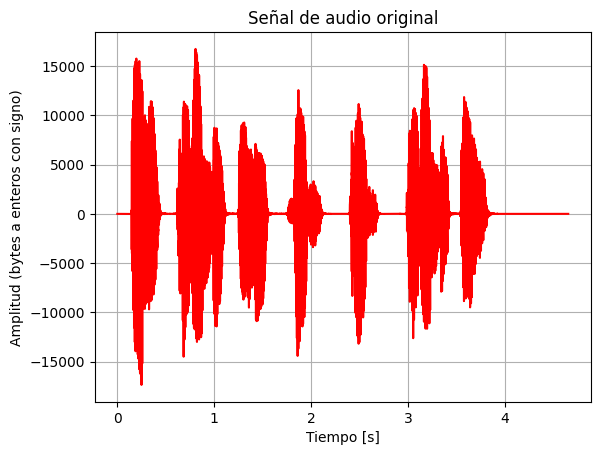

<Figure size 13500x2000 with 0 Axes>

In [77]:
# usamos la funcion del archivo caracterisiticas.py
from importlib import reload
import modules.caracteristicas
reload(modules.caracteristicas)
from modules.caracteristicas import Audio_Grafica
#graficamos la señal
Audio_Grafica(ruta)


# Codificacion de la señal 
Dado que el archivo .wav nos devuelve un conjunto de muestras de 16 bits cada una, ahora convertiremos esas muestras en una señal digital binaria 

In [86]:
from modules.codificar import Codificar_Senial
bits_array = Codificar_Senial(ruta)
print(bits_array)
print("Cantidad de elementos en el arreglo de bits:", len(bits_array))

Canales: 1
Bits por muestra: 16
Frecuencia de muestreo: 24000 Hz
Duración: 4.66 segundos
[0 0 0 ... 0 0 0]
Cantidad de elementos en el arreglo de bits: 1787904


In [ ]:
#Convertimos el arreglo en un tren de pulsos segun corresponda con "1s" y "0s"

#Para ello necesitamos saber la velocidad de transmision, si 16 bits corresponden a una muestra y se muestrea con fs=24000 [Hz]

n = 16 #bits por muestra
fs = 24000 #frecuencia de muestreo [Hz]
Rb = n * fs # [bps]
print("La velocidad de transmision es: Rb = ",Rb,"[bps]")

#Determinamos el ancho de cada bit
Tb = 1 /Rb #[s]
print("El tiempo de cada bit esta dado por: Tb = ",np.round(Tb,8),"[s]")


La velocidad de transmision es: Rb =  384000 [bps]
El tiempo de cada bit esta dado por: Tb =  2.6e-06 [s]


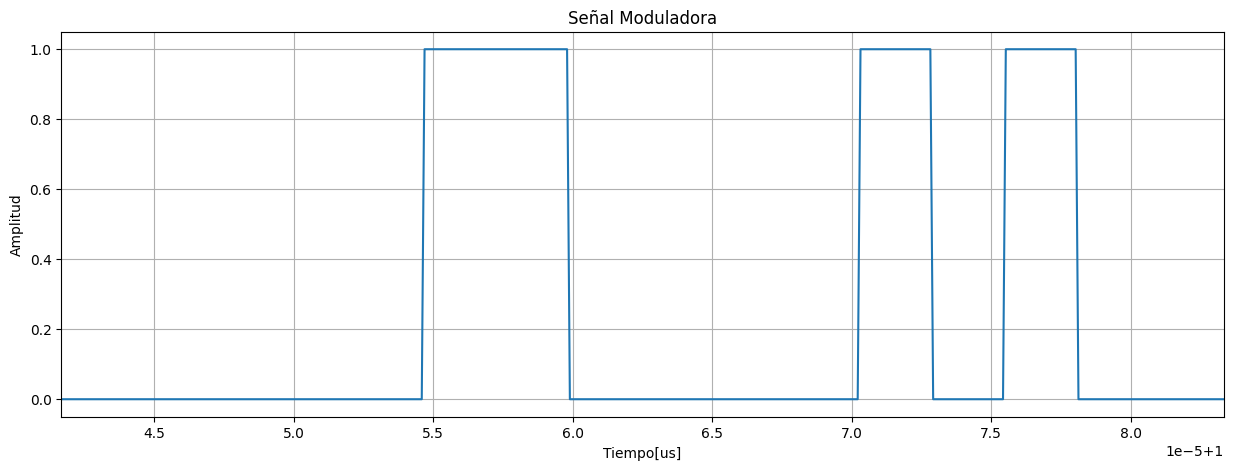

In [ ]:
#Necesitamos tambien la cantidad de puntos por bit 

fs_2 = 10e6 #[Hz] 
muestras_por_bit = int(fs_2*Tb) #Cantidad de puntos a graficar por bit 
N_2 = fs_2 * len(bits_array)*Tb
#Generamos el arreglo del tren de pulsos

#la funcion np.repeat() permite repetir cada elemento del arreglo la cantidad de veces que se indica 
Senial_Moduladora = np.repeat(bits_array,muestras_por_bit)
#generamos el eje de tiempo de la señal
t_moduladora = np.linspace(start=0,stop= len(bits_array)*Tb,num=len(Senial_Moduladora),endpoint=False)

#Graficamos la señal 
plt.figure(figsize=(15,5))
plt.plot(t_moduladora,Senial_Moduladora)
plt.grid(True)
plt.xlim(1+Tb*16,1+Tb*32)
#plt.xticks(np.arange(1+Tb*16,1+Tb*32,Tb))
plt.title("Señal Moduladora")
plt.xlabel("Tiempo[us]")
plt.ylabel("Amplitud")

plt.show()

# FFT de la Señal Moduladora
Dado que tenemos la representacion en el tiempo de la señal moduladora, podemos representar su espectro, tal que:

In [ ]:
# Obtenemos la FFT de la señal moduladora 
# FFT_Moduladora = np.fft.fft(Senial_Moduladora)
# Normalizamos y centramos 
# FFT_Moduladora_Shift= np.fft.fftshift(FFT_Moduladora/int(len(Senial_Moduladora)))
# Obtenemos el eje de frecuencias 
# f_moduladora = np.fft.fftshift(np.fft.fftfreq(int(len(Senial_Moduladora)),d=1/fs_2))

#Graficamos el espectro 
plt.figure(figsize=(15,5))
# plt.plot(f_moduladora,np.abs(FFT_Moduladora_Shift))
plt.grid(True)
plt.xlabel("Frecuencia [Hz]")
plt.title("Espectro señal moduladora (Modulo)")
plt.ylabel("Amplitud")
plt.xlim(-5e6,5e6)
plt.show()

MemoryError: 

# Señal de Portadora 

 Para modular la señal necesitamos una señal de portadora, entre los requisitos se indica una señal portadora con frecuencia entre 5kHz y 10kHz

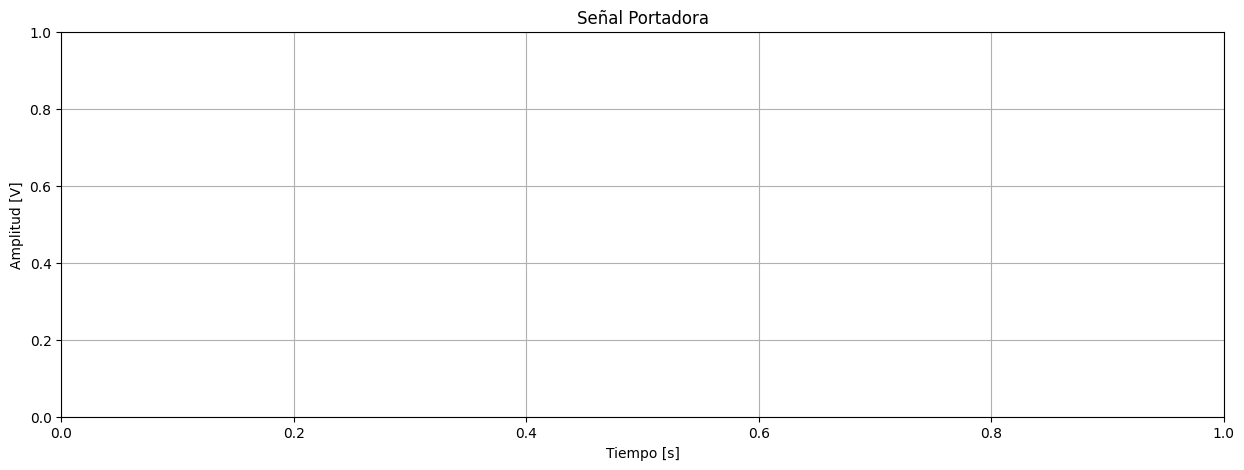

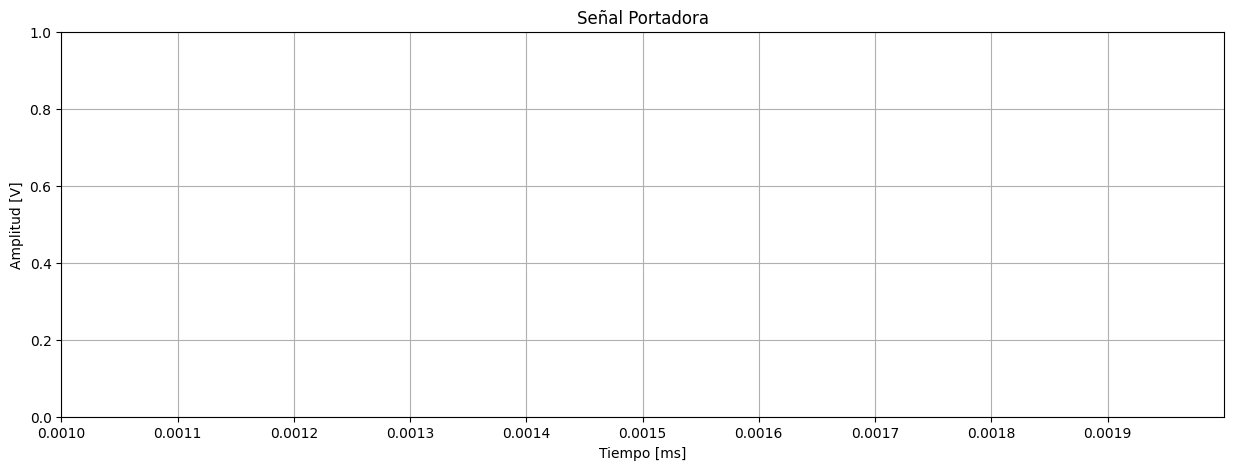

In [131]:
from math import pi  
#Generamos una señal de portadora sinusoidal con una frecuencia de 10kHz y la misma duracion que la señal de audio

Amplitud = 1 #[V]
frecuencia_portadora = 10000 #[Hz]
duracion_portadora = 4.66 #[s]
frecuencia_muestreo = 10e6 #Hz
Cantidad_Puntos = frecuencia_muestreo * duracion_portadora #[Hz]

#Eje de tiempo 
t_portadora = np.linspace(start=0,stop=duracion_portadora,num=int(Cantidad_Puntos),endpoint=False)
#Endpoint=false para que no interprete el comienzo de un nuevo periodo en ese punto 

#Señal sen 
Cos_Portadora = Amplitud * np.cos(2 * frecuencia_portadora * t_moduladora * pi)

#graficamos la señal
plt.figure(figsize=(15,5))
#plt.plot(t_portadora,Cos_Portadora)
plt.title("Señal Portadora")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.show()

#graficamos una parte de la señal para visualizar mejor
plt.figure(figsize=(15,5))
#plt.plot(t_portadora,Cos_Portadora)
plt.xlim(0.001,0.002)
plt.xticks(np.arange(0.001,0.002,0.0001))
plt.title("Señal Portadora")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.show()

# FFT de la señal portadora
Con la FFT pdoemos determinar el espectro de la señla de portadora y verificar que se encuentra en la componente de frecuencia que queremos

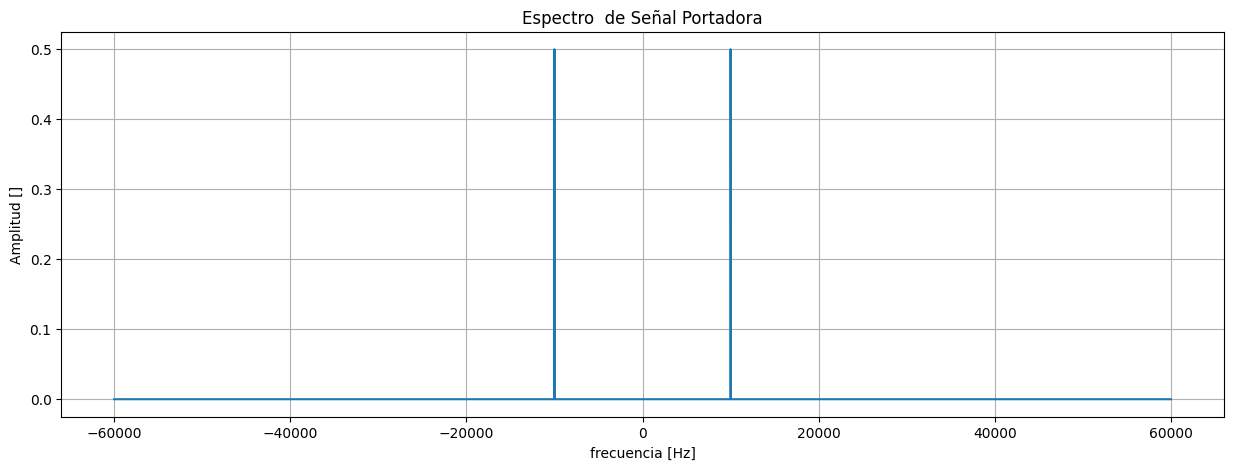

In [101]:
# realizamos la operacion de FFT de la libreria "np"
FFT_Cos_Portadora = np.fft.fft(Cos_Portadora)
# Centramos y normalizamos 
FFT_Cos_Portadora_Shift = np.fft.fftshift(FFT_Cos_Portadora/int(Cantidad_Puntos))
# Definimos el eje de frecuencias 
# fftfreq(cantidad_de_puntos_total_int,espacio_entre_muestras)
eje_f_FFT = np.fft.fftshift( np.fft.fftfreq(int(Cantidad_Puntos),d=1/frecuencia_muestreo))

#graficamos el espectro 

plt.figure(figsize=(15,5))
plt.plot(eje_f_FFT,np.abs(FFT_Cos_Portadora_Shift))
plt.title("Espectro  de Señal Portadora")
plt.xlabel("frecuencia [Hz]")
plt.ylabel("Amplitud []")
plt.grid(True)
plt.show()

# Modulacion OOK

Sabemos que es un tipo de modulacion de amplitud donde tenemos:
- Señal moduladora digital: Señal de audio codificada --> Señal de banda base unipolar 
- Señal Portadora Analogica:  Sinusoidal con frecuencia de 10kHz
* Sabemos que podemos realizar la modulacion con un modulador balanceado que realice el producto entre las dos señales 

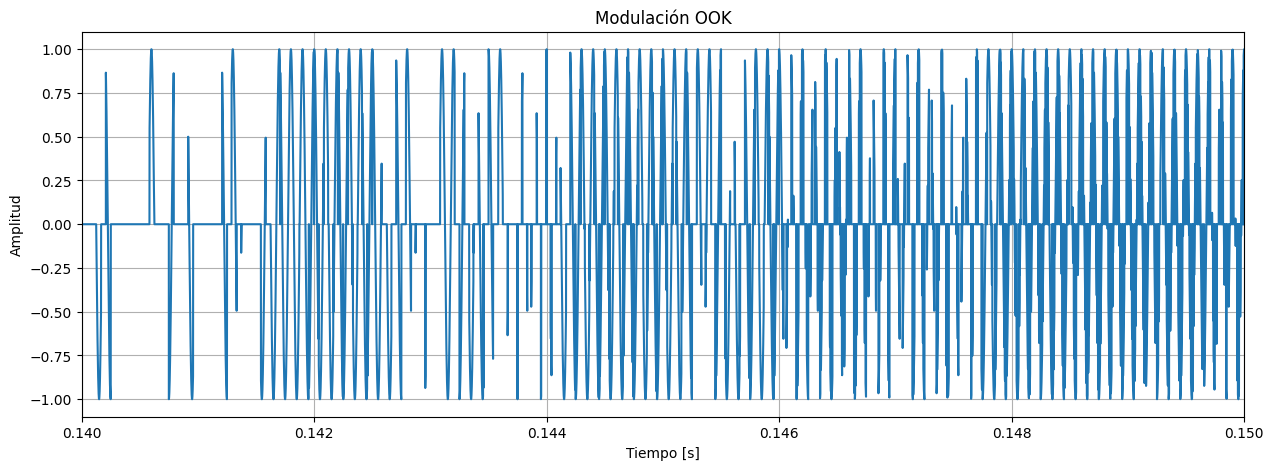

In [148]:
# El modulador balanceado lo que hace es realizar el producto en el tiempo de las dos señales, por teorema de convolucion, en la frecuencia
# realiza la convolucion de los espectros de las señales 

#Si tenemos un arreglo de bits que representa la señal moduladora y una señal portadora de 10kHz coseniodal 

Senial_OOK = Senial_Moduladora * Cos_Portadora

#Graficamos la señal 

plt.figure(figsize=(15,5))
plt.plot(t_moduladora[:1500000], Senial_OOK[:1500000])  # solo primeros 1000 puntos para visualizar bien
plt.grid(True)
plt.title("Modulación OOK")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(np.arange(0.14,0.16,0.01))
plt.show()
